Dear Dr. Roberts, please install the packages "pandas" and "networkx", as these are not part of the scikit-tda collection and need to be installed in order to run all of the code snippets below. Throughout this tutorial I had to make multiple fixes to the code, due to my current python version (3.11) not matching with the version the code was written in. I annotated multiple examples via comments, so please keep an eye out!

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

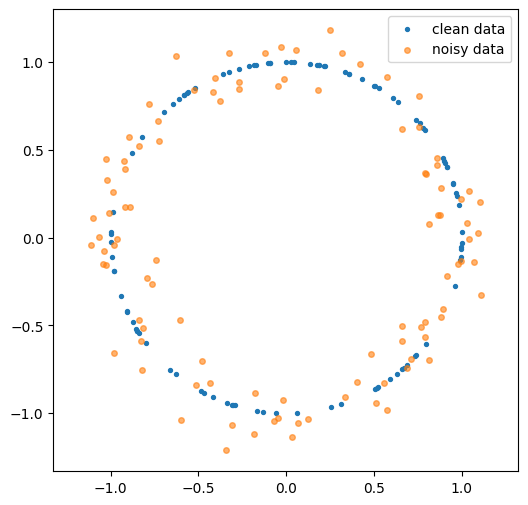

In [2]:
import tadasets
np.random.seed(565656)

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.10) 

# data_clean = tadasets.infty_sign(n=100, noise=0.0)
# data_noisy = tadasets.infty_sign(n=100, noise=0.15) 

plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data", s=8)
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data", s=16, alpha=0.6)
plt.axis('equal')
plt.legend()
plt.show()

In [3]:
import ripser
import persim

def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

In [4]:
# ripser.ripser(data_clean)

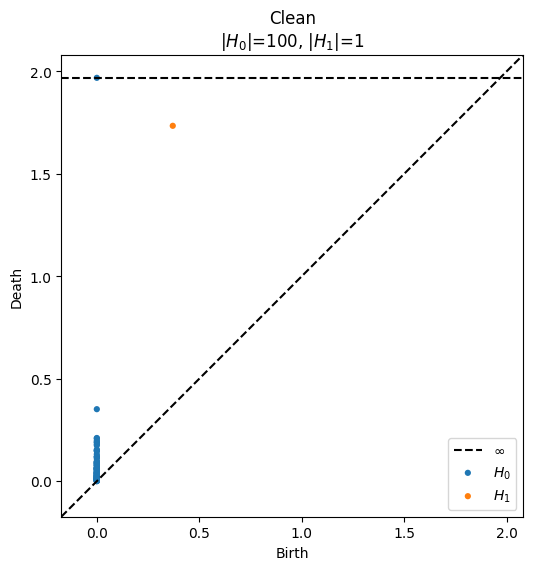

In [5]:
dgm_clean = ripser.ripser(data_clean)['dgms']
persim.plot_diagrams(
    dgm_clean, 
    show=True, 
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
) 

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


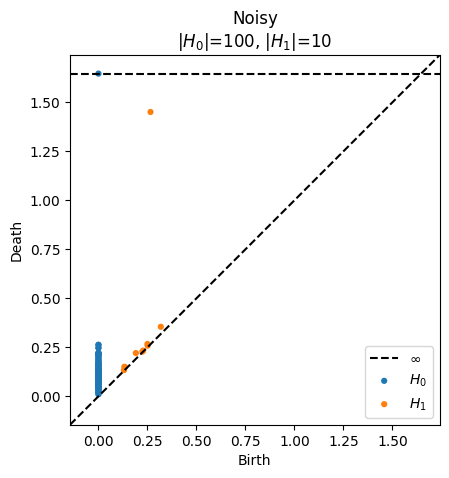

In [6]:
from ripser import Rips
rips = Rips()
dgm_noisy = rips.transform(data_noisy)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_noisy)}") 

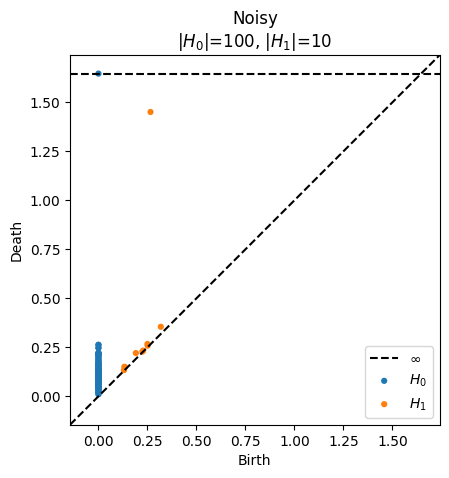

In [7]:
from sklearn.metrics.pairwise import pairwise_distances

D = pairwise_distances(data_noisy, metric='euclidean')

dgm_noisy = ripser.ripser(D, distance_matrix=True)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy\n{diagram_sizes(dgm_noisy)}"
) 

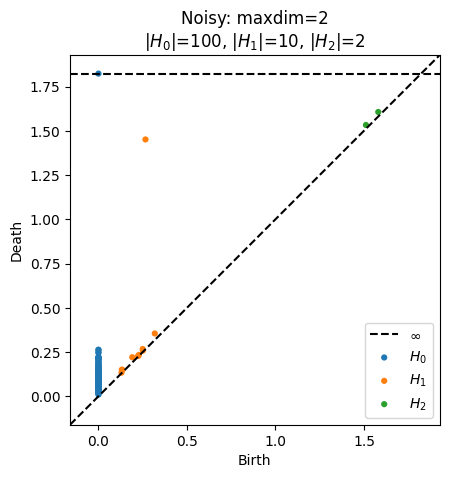

In [8]:
dgm_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
) 

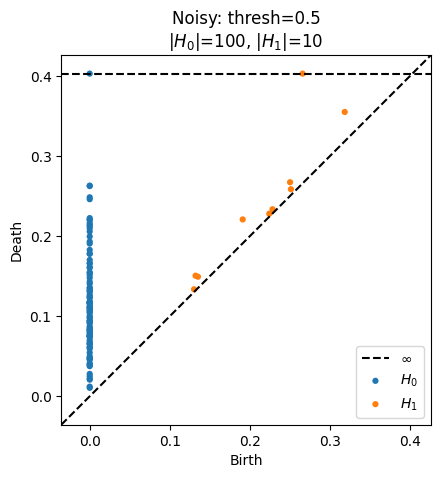

In [9]:
thresh = 0.5
dgm_noisy = ripser.ripser(data_noisy, thresh=thresh)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy: thresh={thresh}\n{diagram_sizes(dgm_noisy)}"
) 

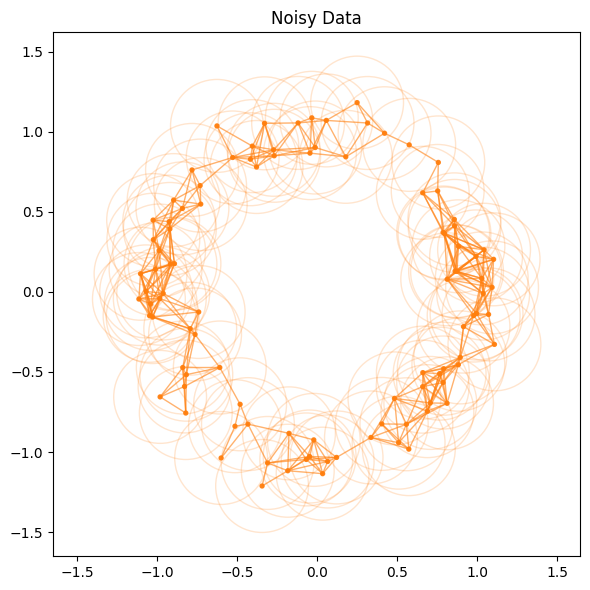

In [10]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import colormaps # New import from Jan, due to deprecation warning for old cm.get_cmap(obj)

def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = colormaps.get_cmap('tab10') # Fixed deprecation error

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

plot_rips_complex(data_noisy, R=0.29, label="Noisy Data", maxdim=1)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


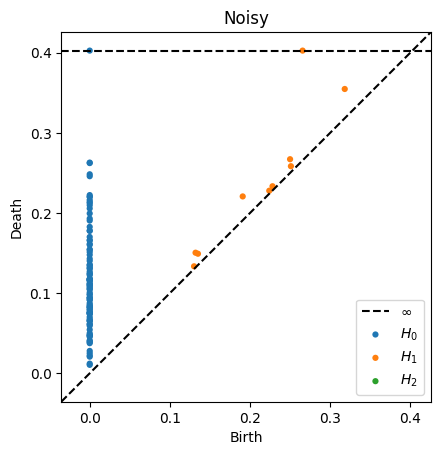

In [11]:
rips = Rips()
rips.maxdim = 2
rips.thresh = 0.5
rips.coef = 3
rips.transform(data_noisy)
rips.plot(show=True, title='Noisy') 

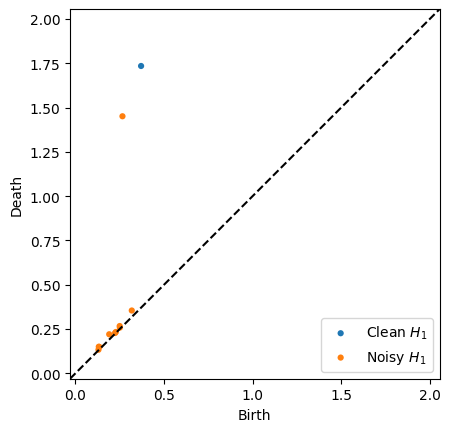

In [12]:
dgms_clean = ripser.ripser(data_clean)['dgms']
dgms_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    [dgms_clean[1], dgms_noisy[1]], 
    labels=['Clean $H_1$', 'Noisy $H_1$'], 
    show=True
)

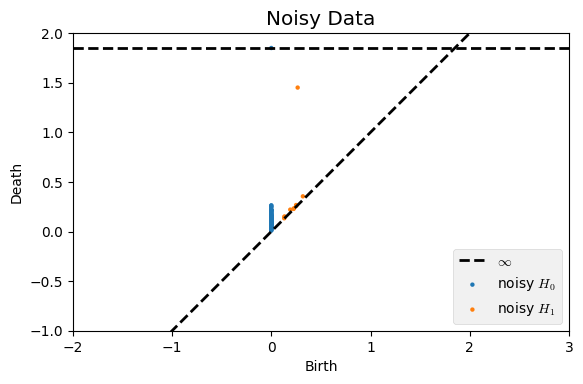

In [13]:
persim.plot_diagrams(
    dgms_noisy, 
    title="Noisy Data",
    labels=["noisy $H_0$", "noisy $H_1$"],
    colormap="bmh",
    xy_range=[-2,3, -1, 2],
    size=10,
    diagonal=True,
    show=True
)

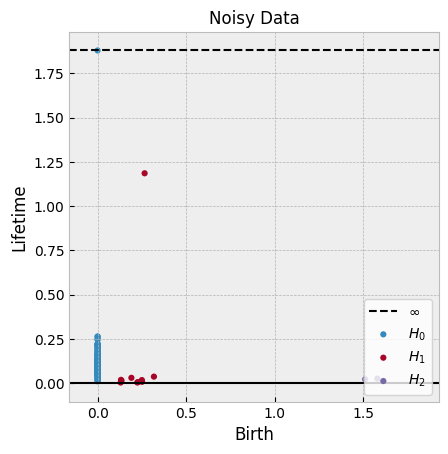

In [14]:
persim.plot_diagrams(
    dgms_noisy, 
    title="Noisy Data",
    lifetime=True,
    show=True
)

<Axes: title={'center': 'Persistence Image'}, xlabel='birth', ylabel='persistence'>

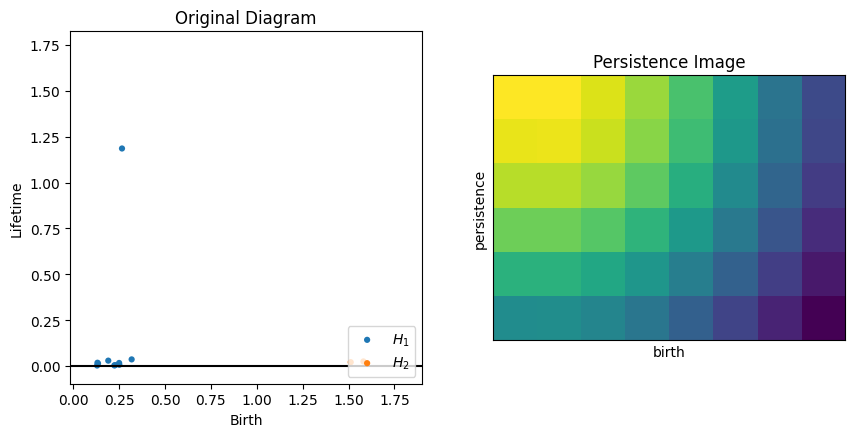

In [15]:
from persim import PersistenceImager
import collections
collections.Iterable = collections.abc.Iterable # Necessary to add due to source code throwing an error due to version mismatch - Jan

pimager = PersistenceImager(pixel_size=0.2)

# The `fit()` method can be called on one or more (*,2) numpy arrays 
# to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs. 
# The ranges and resolution are automatically adjusted to accomodate the specified pixel size.
pimager.fit(dgms_noisy[1:3]) #

# The `transform()` method can then be called on one or more (*,2) numpy arrays 
# to generate persistence images from diagrams.
imgs = pimager.transform(dgms_noisy[1:3])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].set_title("Original Diagram")
persim.plot_diagrams(dgms_noisy[1:3],  lifetime=True, ax=axs[0], labels=["$H_1$", "$H_2$"])

axs[1].set_title("Persistence Image")
pimager.plot_image(imgs[0], ax=axs[1])

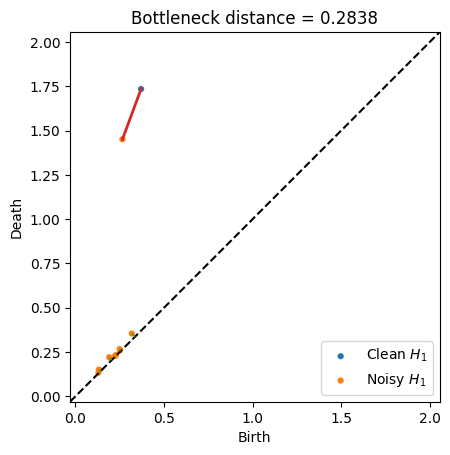

In [16]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]

# The bottleneck of the matching is shown as a red line, 
# while the other pairs in the perfect matching which are less than the diagonal are shown as green lines 
# (NOTE: There may be many possible matchings with the minimum bottleneck, and this returns an arbitrary one)
distance_bottleneck, matching = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck_matching(
    dgm_clean, dgm_noisy, matching, 
    labels=['Clean $H_1$', 'Noisy $H_1$']
)
plt.title(f"Bottleneck distance = {distance_bottleneck:0.4f}",)
plt.show()

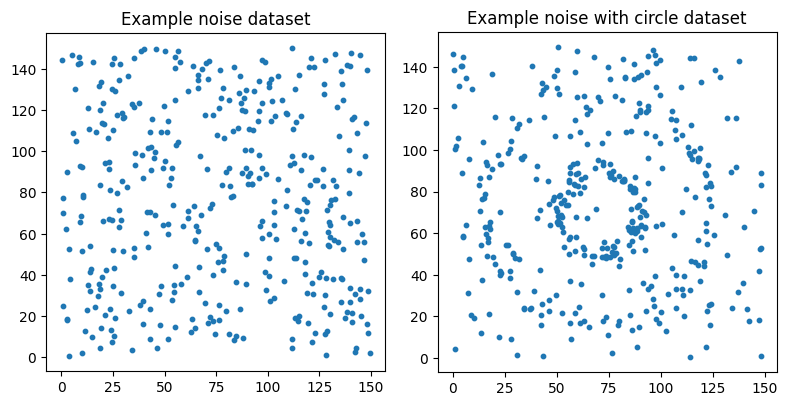

In [17]:
np.random.seed(565656)
M = 50           # total number of samples
m = int(M / 2)   # number of samples per class ('noise'/'circles')
N = 400          # number of points per dataset

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    """Generates two circles with center at `offset` scaled by `scale`"""
    half = int(N/2)
    circ = np.concatenate(
        (tadasets.dsphere(d=1, n=half, r=1.1, noise=0.05),
        tadasets.dsphere(d=1, n=N-half, r=0.4, noise=0.05))
    )
    return offset + scale * circ

# Generate data
just_noise = [noise(N, 150) for _ in range(m)]

half = int(N / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(N - half, 150)))
               for _ in range(m)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(M)
labels[m:] = 1

# Visualize the data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(8,4)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys, s=10)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_, s=10)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


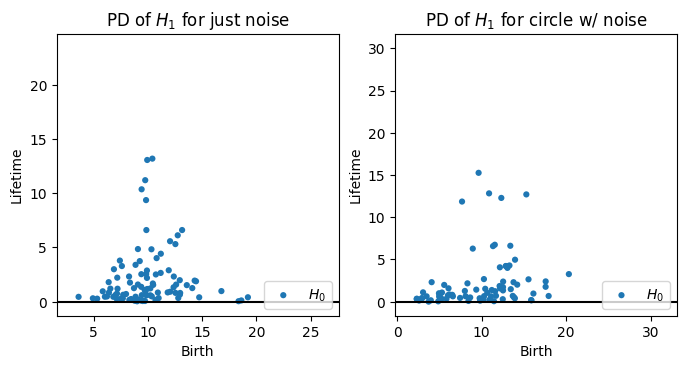

In [18]:
rips = ripser.Rips(maxdim=1, coeff=2)
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

plt.figure(figsize=(8,4))

plt.subplot(121)
rips.plot(diagrams_h1[0], show=False, lifetime=True)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False, lifetime=True)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

PI Resolution = (33, 23)


Text(0.5, 1.0, 'PI of $H_1$ for circle w/ noise')

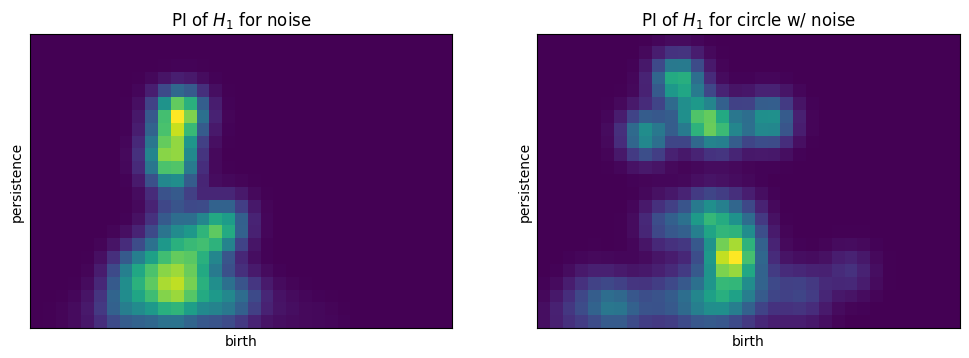

In [19]:
pimgr = PersistenceImager(pixel_size=0.8)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)
print(f"PI Resolution = {pimgr.resolution}")

plt.figure(figsize=(12, 7))
ax = plt.subplot(121)
pimgr.plot_image(imgs[0], ax)
plt.title("PI of $H_1$ for noise")

ax = plt.subplot(122)
pimgr.plot_image(imgs[-1], ax)
plt.title("PI of $H_1$ for circle w/ noise")

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# train/test data
imgs_array = np.array([img.flatten() for img in imgs])
X_train, X_test, y_train, y_test = train_test_split(
    imgs_array, labels, test_size=0.40, random_state=42
)
print(f"Train size = {X_train.shape[0]}\n"
      f"Test size  = {X_test.shape[0]} \n"
      f"Dimensions = {imgs_array.shape[1]}")

# logistic regression
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f"{'-'*35}\nTrain score = {train_score}; Test score={test_score}")

Train size = 30
Test size  = 20 
Dimensions = 759
-----------------------------------
Train score = 1.0; Test score=0.85


In [21]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

# reading nodes
nodes = pd.read_csv(
    "data/sfNames.csv", 
    header=0, sep=" ", 
    dtype={'id': int, 'name': str}, 
)

nodes['isRxn'] = nodes['name'].str.contains("Rxn").astype(int)
nodes["name"] = nodes['name'].str.replace("Rxn: ", "").str.replace(" ", "")
nodes["color"] = pd.Series(pd.Categorical.from_codes(nodes["isRxn"], categories=["cyan", "orange"]))
nodes = nodes.set_index('id', drop=False)

# reading edges
edges = pd.read_csv(
    "data/sfEdgeWeights.csv", 
    header=0, sep=" ", 
    dtype=dict(source=int, target=int, weight=float), 
)

# create a bipartite graph
G = nx.from_pandas_edgelist(edges, create_using=nx.DiGraph, edge_attr=True,)
nx.set_node_attributes(G, nodes['isRxn'].to_dict(), "bipartite")
print(f"is bipartite = {bipartite.is_bipartite(G)}")

is bipartite = True


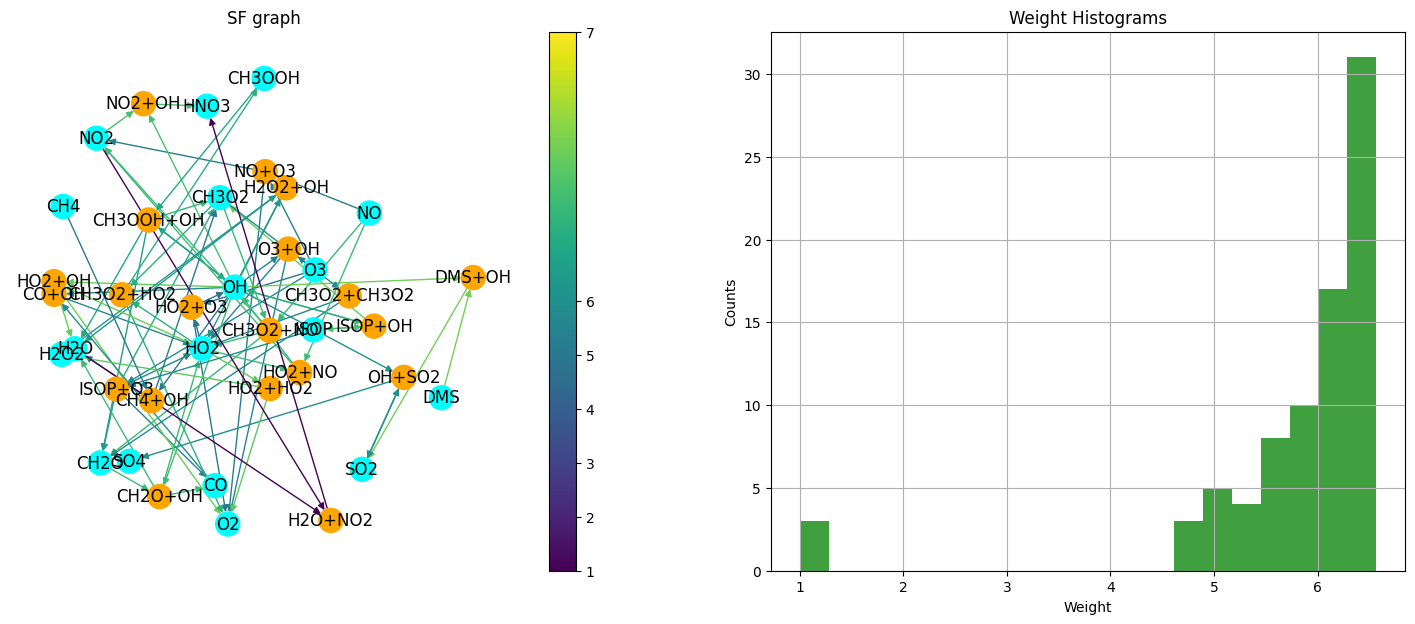

In [22]:
# edge weights
G_weights = [e[2]['weight'] for e in G.edges.data()]

# plot graph
norm = colors.TwoSlopeNorm(
    vcenter=round(np.mean(G_weights)),
    vmin=round(min(G_weights)),
    vmax=round(max(G_weights))
)
virdis_cmap = colormaps.get_cmap('viridis') # Replaced deprecated function cm.get_cmap(obj)
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
axs[0].set_title("SF graph")    
nx.draw(
    G, ax=axs[0], 
    pos=nx.spring_layout(G, scale=80, k=2), 
    labels=nodes['name'].to_dict(),
    node_color=nodes['color'].loc[list(G)].to_list(),
    edge_color=virdis_cmap(norm(G_weights)),
    with_labels=True,
)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=virdis_cmap), ax=axs[0])

# plot weight histogram
axs[1].hist(G_weights, bins=20, facecolor='g', alpha=0.75)
axs[1].set_title("Weight Histograms")
axs[1].set_xlabel("Weight")
axs[1].set_ylabel("Counts")
axs[1].grid()

plt.show()

In [23]:
G = nx.Graph(G)    # to undirected
A = nx.adjacency_matrix(G).copy().todense().astype(float)
A[A == 0] = np.inf
np.fill_diagonal(A, [0]*len(G))
A = np.array(np.round(A, 4))
print(f"is symmetric = {np.allclose(np.asarray(A.T), np.asarray(A))}")

is symmetric = True


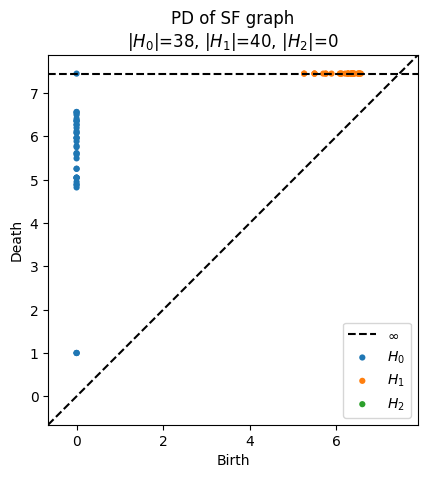

In [24]:
dgms = ripser.ripser(A, distance_matrix=True, maxdim=2)['dgms']
persim.plot_diagrams(
    dgms, show=True, 
    title=f"PD of SF graph\n{diagram_sizes(dgms)}"
) 

In [25]:
# compute shortest path matrix
def get_path_distance_matrix(G, lnorm='L1'):
    L0 = lnorm == 'L0'
    L1 = lnorm == 'L1'
    node_idx = {n: i for i, n in enumerate(G.nodes)}
    D = np.full((len(G), len(G)), np.inf)
    for n, (dists, paths) in nx.all_pairs_dijkstra(G, weight='weight'):
        for k, dist in dists.items():
            D[node_idx[n], node_idx[k]] = dist if L1 else len(paths[k]) if L0 else 1
    return np.array(np.round(D, 4))

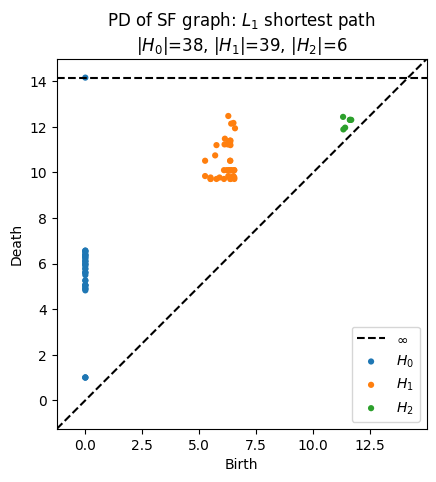

In [26]:
D1 = get_path_distance_matrix(G, lnorm='L1')
dgms_L1 = ripser.ripser(D1, distance_matrix=True, maxdim=2)['dgms']

persim.plot_diagrams(
    dgms_L1, show=True, 
    title=f"PD of SF graph: $L_1$ shortest path\n{diagram_sizes(dgms_L1)}"
) 

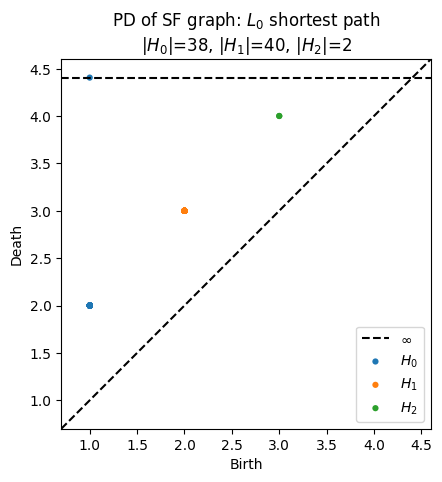

In [27]:
D0 = get_path_distance_matrix(G, lnorm='L0')
dgms_L0 = ripser.ripser(D0, distance_matrix=True, maxdim=2)['dgms']

persim.plot_diagrams(
    dgms_L0, show=True, 
    title=f"PD of SF graph: $L_0$ shortest path\n{diagram_sizes(dgms_L0)}"
) 